# image data load

In [ ]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf


In [ ]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


# Plot some images from the dataset to visualize the dataset

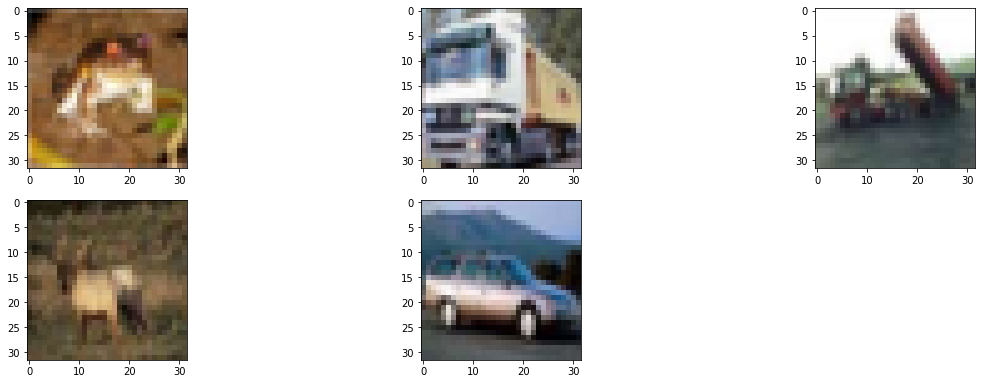

In [ ]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i])
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout,Activation
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.utils import np_utils


# Convert the pixel values of the dataset to float type and then normalize the dataset

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255.0
x_test = x_test/255.0

# Now perform the one hot encoding for target classes

In [ ]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
num_classes

10

In [ ]:
model=Sequential([
                   tf.keras.layers.Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)),
                   tf.keras.layers.Dropout(0.2),
                  
                   tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)),
                   tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                  
                   tf.keras.layers.Conv2D(64,(3,3), activation='relu',padding='same',kernel_constraint=maxnorm(3)),
                   tf.keras.layers.Dropout(0.2),
                  
                   tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', kernel_constraint=maxnorm(3)),
                   tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                   
                   tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same', kernel_constraint=maxnorm(3)),
                   tf.keras.layers.Dropout(0.2),
                  
                   tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same', kernel_constraint=maxnorm(3)),
                   tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                  
                   tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same', kernel_constraint=maxnorm(3)),
                   tf.keras.layers.Dropout(0.2),
                  
                   tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same', kernel_constraint=maxnorm(3)),
                   tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

                   tf.keras.layers.Flatten(),
                   tf.keras.layers.Dropout(0.5),
                  
                   tf.keras.layers.Dense(1024,activation='relu',kernel_constraint=maxnorm(3)),
                   tf.keras.layers.Dropout(0.5),

                   tf.keras.layers.Dense(512,activation='relu',kernel_constraint=maxnorm(3)),
                   tf.keras.layers.Dropout(0.5),
                  
                   tf.keras.layers.Dense(num_classes,activation='softmax')
])



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        3

In [ ]:
sgd=SGD(learning_rate=0.01,momentum=0.9,decay=(0.01/100),nesterov=False)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
history=model.fit(x_train, y_train, epochs=20, verbose=1,validation_data=(x_test, y_test),batch_size=64)

Epoch 1/20
782/782 [==============================] - 596s 763ms/step - loss: 2.1309 - accuracy: 0.1949 - val_loss: 1.9400 - val_accuracy: 0.2649
Epoch 2/20
782/782 [==============================] - 600s 767ms/step - loss: 1.7828 - accuracy: 0.3192 - val_loss: 1.5894 - val_accuracy: 0.4139
Epoch 3/20
782/782 [==============================] - 602s 770ms/step - loss: 1.5747 - accuracy: 0.4107 - val_loss: 1.4498 - val_accuracy: 0.4663
Epoch 4/20
782/782 [==============================] - 599s 766ms/step - loss: 1.4020 - accuracy: 0.4852 - val_loss: 1.3080 - val_accuracy: 0.5213
Epoch 5/20
782/782 [==============================] - 594s 760ms/step - loss: 1.2518 - accuracy: 0.5497 - val_loss: 1.1020 - val_accuracy: 0.6001
Epoch 6/20
782/782 [==============================] - 608s 777ms/step - loss: 1.1172 - accuracy: 0.6007 - val_loss: 1.0171 - val_accuracy: 0.6393
Epoch 7/20
782/782 [==============================] - 614s 786ms/step - loss: 1.0176 - accuracy: 0.6370 - val_loss: 0.9026 -

# Evaluating accuracy and loss for the model

Text(0.5, 1.0, 'Training and validation loss')

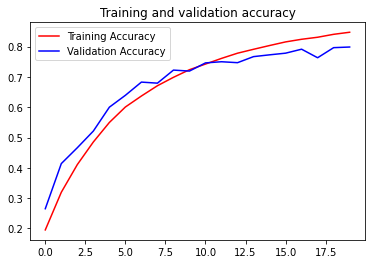

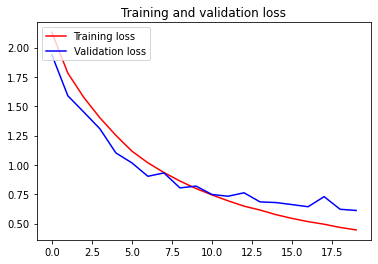

In [16]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt



acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs


# Plot training and validation accuracy per epoch

plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.figure()


# Plot training and validation loss per epoch

plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation  Loss")
plt.legend(['Training loss', 'Validation loss'], loc='upper left')

plt.title('Training and validation loss')



# Calculate its accuracy on testing data

In [17]:
_,acc=model.evaluate(x_test, y_test)
print(acc*100)

313/313 [==============================] - 24s 76ms/step - loss: 0.6112 - accuracy: 0.7987
79.86999750137329


# Save the model 

In [18]:
model.save('model1_cifar10_10epochs.h5')

# Make a dictionary to map to the output classes and make predictions from the model

In [24]:
from google.colab import files
img=files.upload()

Saving download.jpg to download.jpg


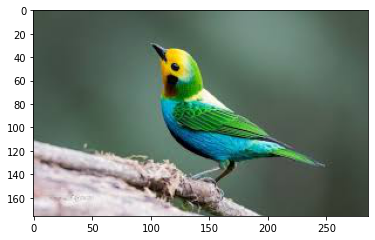

In [25]:
from PIL import Image
im=Image.open('download.jpg')
plt.imshow(im)
plt.show()

In [26]:
results={0:'aeroplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

from PIL import Image


im=Image.open('download.jpg')
im=im.resize((32,32))
im=np.expand_dims(im, axis=0)
im=np.array(im)
pred=model.predict_classes([im])[0]
print(pred, results[pred])

2 bird
